In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import metrics
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import multiclass
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import decomposition
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Conv1D, MaxPool1D, GlobalMaxPool1D, Activation, SpatialDropout1D, LSTM, SimpleRNN
from keras.optimizers import Adam, SGD, RMSprop
from keras import losses, optimizers
from keras import preprocessing
from keras.utils import to_categorical
from keras.losses import CategoricalCrossentropy, BinaryCrossentropy

from matplotlib import pyplot as plt

import tensorflow as tf

Izvršićemo klasifikaciju podataka neurnoskim mrežama za različit broj kategorija (2, 10, 36). Učitaćemo podatke i odraditi vektorizaciju, a zatim podeliti na podatke na trening, test i validacione skupove. Isprobavali smo različite vrednosti za parametre modela (units, epochs, batch_size, learning_rate) kao i broj slojeva i za ove vrednosti smo dobili najbolje moguće modele za naše podatke.

Funkcija <i>GetData</i> će nam služiti za učitavanje podataka u zavisnosti od broja kategorija.

In [2]:
def GetData(num_of_categories, categories):
    news = pd.read_csv('data/vesti.csv')
    if num_of_categories == 36:
        X = news['text']
        y = news['category']
    else:
        news = news[news.category.isin(categories)]
        X = news['text']
        y = news['category']
        
    return (X, y)

Funkcija <i>TransformData</i> izršava vektorizaciju nad skupom X i prevodi kategoričke vrednosti skupa y u indikatorske promenljive.

In [3]:
def TransformData(X, y):
    vectorizer = feature_extraction.text.CountVectorizer(min_df=0)
    vectorizer.fit(X.values.astype('U'))

    X_transformed = vectorizer.transform(X.values.astype('U'))

    y_transformed = pd.get_dummies(y).values
    
    return (X_transformed, y_transformed)

Funkcija <i>TrainTestValidationSplit</i> deli podatke na trening, validacioni (validation size: 0.2) i test (test size: 0.2) skup sa stratifikacijom po y skupu.

In [4]:
def TrainTestValidationSplit(X, y):
    X_train_validation, X_test, y_train_validation, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 4)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, test_size = 0.2, stratify = y_train_validation, random_state = 4)
    
    return (X_train, X_validation, X_test, y_train, y_validation, y_test)

Funkcija <i>EvaluateModel</i> će služiti za evaluaciju podataka na test skupu i vizualizaciju dobijenih vrednosti funkcije greške i tačnosti.

In [5]:
def EvaluateModel(model, X_test, y_test, history):
    score = model.evaluate(X_test, y_test)
    print('Test loss: ', score[0])
    print('Test accuracy: ', score[1])
    
    epochs = history.epoch
    
    loss = history.history['loss']
    validation_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']
    
    plt.figure(figsize=(12,8))
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(epochs, loss, c='red', label = 'training')
    plt.plot(epochs, validation_loss, c='orange', label='validation')
    plt.legend(loc = 'best')
    plt.show()
    
    plt.figure(figsize=(12,8))
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(epochs, accuracy, c='red', label = 'training')
    plt.plot(epochs, validation_accuracy, c = 'orange', label = 'validation')
    plt.legend(loc = 'best')
    plt.show()

### Klasifikacija za 2 kategorije

Učitavamo podatke za dve kategorije koje imaju najveći broj članaka u skupu.

In [6]:
categories2 = ['POLITICS', 'WELLNESS']
X2, y2 = GetData(2, categories2)
print(X2.shape)
print(y2.shape)

(50281,)
(50281,)


Transformišemo podatke i delimo ih na skupove za trening, test i validaciju.

In [7]:
X2_transformed, y2_transformed = TransformData(X2, y2)

In [8]:
print(X2_transformed.shape)
print(y2_transformed.shape)

(50281, 42262)
(50281, 2)


In [9]:
X2_train, X2_validation, X2_test, y2_train, y2_validation, y2_test = TrainTestValidationSplit(X2_transformed, y2_transformed)

In [10]:
print(X2_train.shape)
print(X2_test.shape)

(32179, 42262)
(10057, 42262)


In [11]:
print(y2_train.shape)
print(y2_test.shape)

(32179, 2)
(10057, 2)


In [12]:
print(X2_validation.shape)
print(X2_validation.shape)

(8045, 42262)
(8045, 42262)


Kreiramo model i zatim prikazujemo rezultate.

In [13]:
model2 = Sequential()
model2.add(Dense(units = 150, input_dim = X2_train.shape[1], activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(units = 100, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(units = 50, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation = 'softmax'))

model2.compile(optimizer = Adam(learning_rate = 0.0001), loss = CategoricalCrossentropy(), metrics = ['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               6339450   
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1

In [14]:
history2 = model2.fit(X2_train, y2_train, epochs=15, batch_size=128, validation_data=(X2_validation, y2_validation))

Epoch 1/15
252/252 [==============================] - 16s 64ms/step - loss: 0.5002 - accuracy: 0.7434 - val_loss: 0.1860 - val_accuracy: 0.9715
Epoch 2/15
252/252 [==============================] - 15s 59ms/step - loss: 0.1208 - accuracy: 0.9726 - val_loss: 0.0610 - val_accuracy: 0.9804
Epoch 3/15
252/252 [==============================] - 15s 60ms/step - loss: 0.0499 - accuracy: 0.9883 - val_loss: 0.0540 - val_accuracy: 0.9831
Epoch 4/15
252/252 [==============================] - 13s 52ms/step - loss: 0.0301 - accuracy: 0.9928 - val_loss: 0.0553 - val_accuracy: 0.9838
Epoch 5/15
252/252 [==============================] - 16s 63ms/step - loss: 0.0181 - accuracy: 0.9956 - val_loss: 0.0584 - val_accuracy: 0.9840
Epoch 6/15
252/252 [==============================] - 16s 63ms/step - loss: 0.0114 - accuracy: 0.9976 - val_loss: 0.0623 - val_accuracy: 0.9838
Epoch 7/15
252/252 [==============================] - 14s 56ms/step - loss: 0.0081 - accuracy: 0.9983 - val_loss: 0.0670 - val_accuracy:

315/315 [==============================] - 0s 2ms/step - loss: 0.1016 - accuracy: 0.9816
Test loss:  0.1015961617231369
Test accuracy:  0.9816048741340637


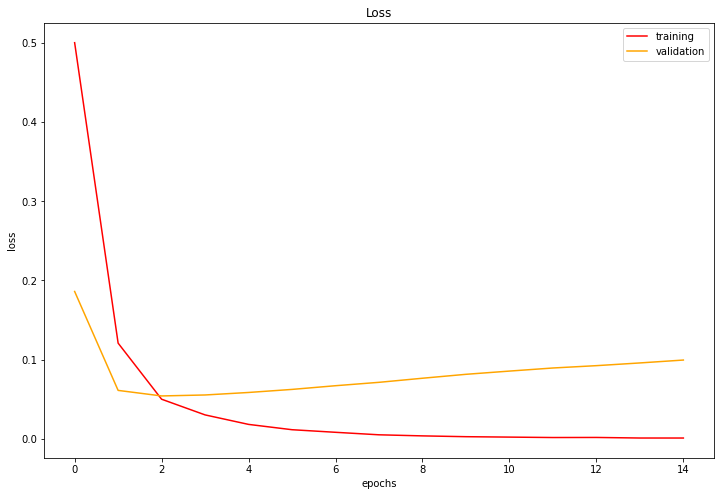

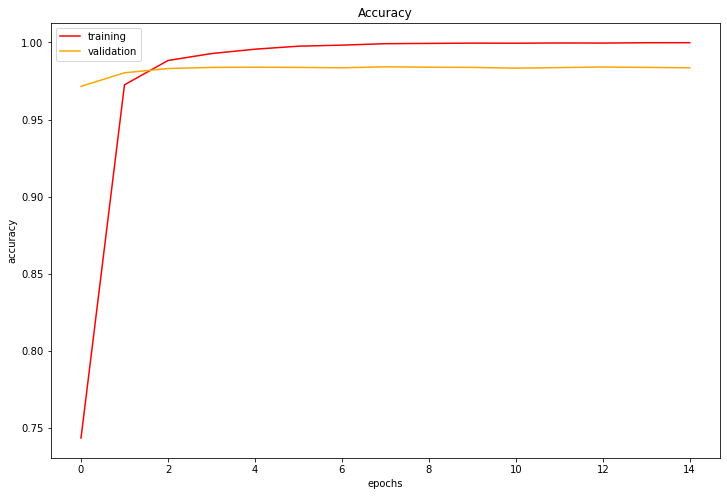

In [15]:
EvaluateModel(model2, X2_test, y2_test, history2)

### Klasifikacija za 10 kategorija

Ponovićemo postupak kao za klasifikaciju za 2 kategorije samo uz drugačiji model. Koristili smo 10 kategorija koje smo koristili i u svsci knn_and_bayes10.ipynb.

In [16]:
categories10 = ['DIVORCE', 'WEDDINGS', 'STYLE AND BEAUTY', 'QUEER VOICES', 'POLITICS', 'HOME & LIVING', 'TRAVEL', 'WORLD NEWS', 'SPORTS', 'ENTERTAINMENT']
X10, y10 = GetData(10, categories10)

In [17]:
print(X10.shape)
print(y10.shape)

(100100,)
(100100,)


In [18]:
X10_transformed, y10_transformed = TransformData(X10, y10)

In [19]:
print(X10_transformed.shape)
print(y10_transformed.shape)

(100100, 70788)
(100100, 10)


In [20]:
X10_train, X10_validation, X10_test, y10_train, y10_validation, y10_test = TrainTestValidationSplit(X10_transformed, y10_transformed)

In [21]:
print(X10_train.shape)
print(X10_test.shape)

(64064, 70788)
(20020, 70788)


In [22]:
print(y10_train.shape)
print(y10_test.shape)

(64064, 10)
(20020, 10)


In [23]:
print(X10_validation.shape)
print(X10_validation.shape)

(16016, 70788)
(16016, 70788)


In [24]:
model10 = Sequential()
model10.add(Dense(units = 200, input_dim = X10_train.shape[1], activation = 'relu'))
model10.add(Dropout(0.5))
model10.add(Dense(units = 120, activation = 'relu'))
model10.add(Dropout(0.5))
model10.add(Dense(units = 80, activation = 'relu'))
model10.add(Dropout(0.5))
model10.add(Dense(units = 30, activation = 'relu'))
model10.add(Dropout(0.5))
model10.add(Dense(10, activation = 'softmax'))

model10.compile(optimizer = Adam(learning_rate = 0.0001), loss = CategoricalCrossentropy(), metrics = ['accuracy'])
model10.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               14157800  
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)               24120     
_________________________________________________________________
dropout_4 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 80)                9680      
_________________________________________________________________
dropout_5 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 30)               

In [25]:
history10 = model10.fit(X10_train, y10_train, epochs=8, batch_size=128, validation_data=(X10_validation, y10_validation))

Epoch 1/8
501/501 [==============================] - 51s 101ms/step - loss: 1.9973 - accuracy: 0.2931 - val_loss: 1.5748 - val_accuracy: 0.5220
Epoch 2/8
501/501 [==============================] - 51s 101ms/step - loss: 1.4319 - accuracy: 0.5271 - val_loss: 1.0028 - val_accuracy: 0.6557
Epoch 3/8
501/501 [==============================] - 53s 106ms/step - loss: 1.0594 - accuracy: 0.6396 - val_loss: 0.8120 - val_accuracy: 0.7160
Epoch 4/8
501/501 [==============================] - 55s 110ms/step - loss: 0.8685 - accuracy: 0.6991 - val_loss: 0.7094 - val_accuracy: 0.7433
Epoch 5/8
501/501 [==============================] - 53s 105ms/step - loss: 0.7427 - accuracy: 0.7377 - val_loss: 0.6499 - val_accuracy: 0.7865
Epoch 6/8
501/501 [==============================] - 57s 114ms/step - loss: 0.6309 - accuracy: 0.7775 - val_loss: 0.6047 - val_accuracy: 0.8069
Epoch 7/8
501/501 [==============================] - 61s 121ms/step - loss: 0.5508 - accuracy: 0.8071 - val_loss: 0.5883 - val_accuracy:

626/626 [==============================] - 1s 2ms/step - loss: 0.5655 - accuracy: 0.8279
Test loss:  0.5655071139335632
Test accuracy:  0.8278721570968628


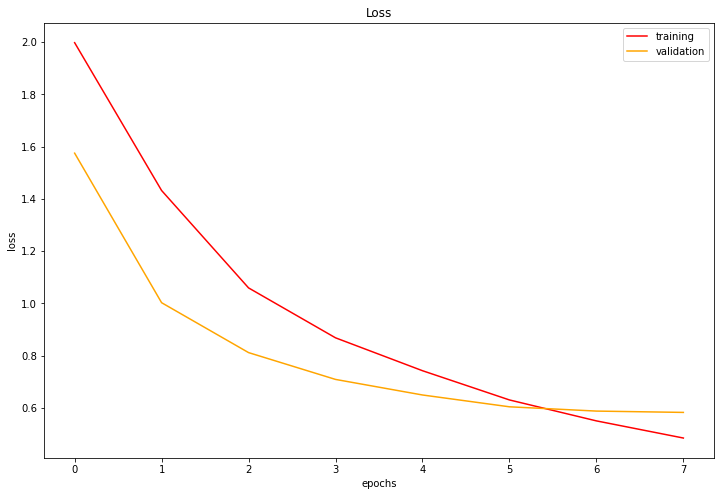

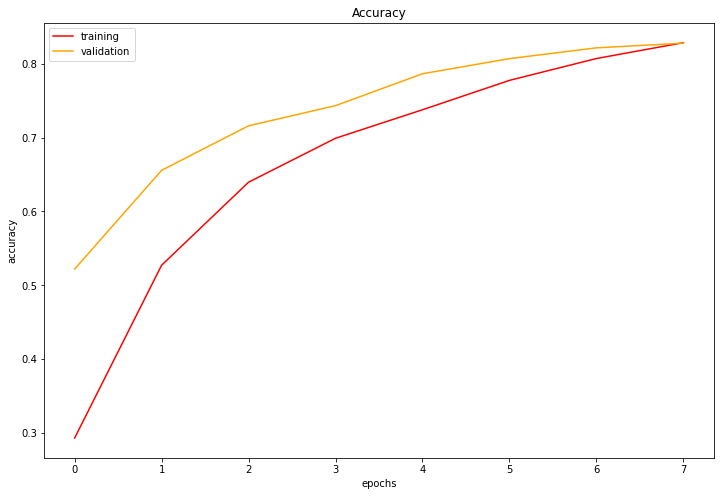

In [26]:
EvaluateModel(model10, X10_test, y10_test, history10)

### Klasifikacija za 36 kategorija

In [27]:
X, y = GetData(36, [])
print(X.shape)
print(y.shape)

(198627,)
(198627,)


In [28]:
X_transformed, y_transformed = TransformData(X, y)

In [29]:
print(X_transformed.shape)
print(y_transformed.shape)

(198627, 110570)
(198627, 36)


In [30]:
X_train, X_validation, X_test, y_train, y_validation, y_test = TrainTestValidationSplit(X_transformed, y_transformed)

In [31]:
print(X_train.shape)
print(X_test.shape)

(127120, 110570)
(39726, 110570)


In [32]:
print(y_train.shape)
print(y_test.shape)

(127120, 36)
(39726, 36)


In [33]:
print(X_validation.shape)
print(X_validation.shape)

(31781, 110570)
(31781, 110570)


In [34]:
model = Sequential()
model.add(Dense(units = 200, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 150, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 60, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(36, activation = 'softmax'))

model.compile(optimizer = Adam(learning_rate=0.0001), loss = CategoricalCrossentropy(), metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 200)               22114200  
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 150)               30150     
_________________________________________________________________
dropout_8 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               15100     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 60)               

In [35]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_validation, y_validation))

Epoch 1/10
994/994 [==============================] - 151s 152ms/step - loss: 3.0577 - accuracy: 0.1913 - val_loss: 2.5503 - val_accuracy: 0.3374
Epoch 2/10
994/994 [==============================] - 153s 154ms/step - loss: 2.4565 - accuracy: 0.3581 - val_loss: 2.1263 - val_accuracy: 0.4463
Epoch 3/10
994/994 [==============================] - 150s 151ms/step - loss: 2.1184 - accuracy: 0.4400 - val_loss: 1.8728 - val_accuracy: 0.5223
Epoch 4/10
994/994 [==============================] - 169s 170ms/step - loss: 1.8627 - accuracy: 0.5003 - val_loss: 1.6895 - val_accuracy: 0.5647
Epoch 5/10
994/994 [==============================] - 157s 157ms/step - loss: 1.6662 - accuracy: 0.5427 - val_loss: 1.5851 - val_accuracy: 0.5966
Epoch 6/10
994/994 [==============================] - 148s 149ms/step - loss: 1.5052 - accuracy: 0.5778 - val_loss: 1.5250 - val_accuracy: 0.6191
Epoch 7/10
994/994 [==============================] - 150s 151ms/step - loss: 1.3800 - accuracy: 0.6074 - val_loss: 1.4870 -

1242/1242 [==============================] - 2s 2ms/step - loss: 1.4908 - accuracy: 0.6579
Test loss:  1.4908291101455688
Test accuracy:  0.6579318046569824


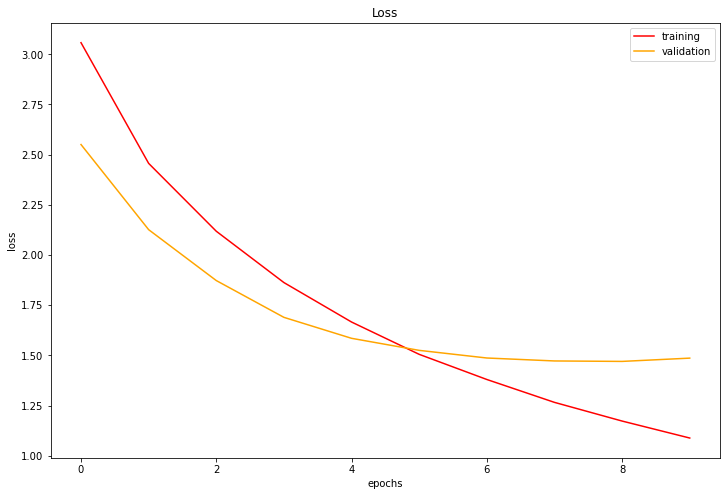

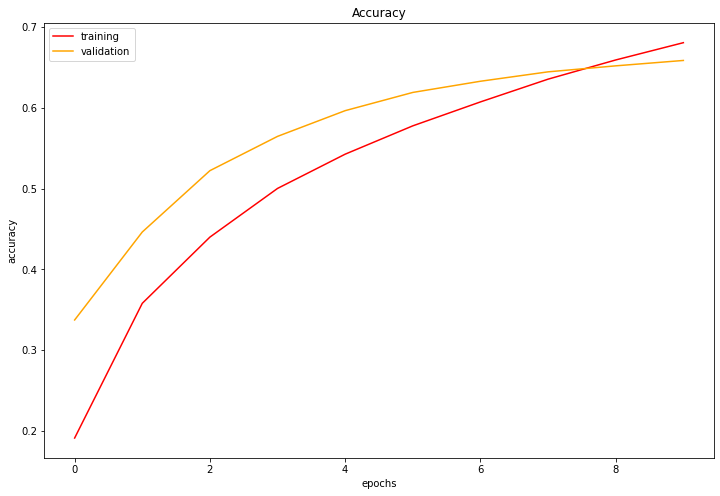

In [36]:
EvaluateModel(model, X_test, y_test, history)